In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
phis = pd.read_csv('Website Phishing.csv')

In [3]:
# Define feature columns and target column
feature_cols = ['SFH','popUpWidnow','SSLfinal_State','Request_URL','URL_of_Anchor','web_traffic','URL_Length','age_of_domain','Result']
target_col = ['having_IP_Address']

In [ ]:
# Split the dataset into features (X) and target (y)
X = phis[feature_cols]
y = phis[target_col]

In [5]:
# Convert target variable to a NumPy array
y = y.values.ravel()

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  # 70% training and 30% test

In [7]:
# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

In [8]:
# Train the model using the training sets
clf.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
# Predict the labels for the test set
y_pred = clf.predict(X_test)

In [11]:
# Model Accuracy: how often is the classifier correct?
accuracy = clf.score(X_test, y_test)

In [12]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [13]:
# Extract confusion matrix elements
tn, fp, fn, tp = cm.ravel()

In [14]:
# Calculate error rate
error_rate = (fp + fn) / (tn + fp + fn + tp)

In [15]:
# Calculate sensitivity (true positive rate)
sensitivity = tp / (tp + fn)

In [16]:
# Calculate specificity (true negative rate)
specificity = tn / (tn + fp)

In [17]:
# Calculate false positive rate
false_positive_rate = fp / (fp + tn)

In [18]:
# Print evaluation metrics
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("False Positive Rate:", false_positive_rate)

Accuracy: 0.8522167487684729
Error Rate: 0.1477832512315271
Sensitivity: 0.18518518518518517
Specificity: 0.9545454545454546
False Positive Rate: 0.045454545454545456


In [19]:
# Get feature importances
feature_imp = pd.Series(clf.feature_importances_, index=feature_cols).sort_values(ascending=False)

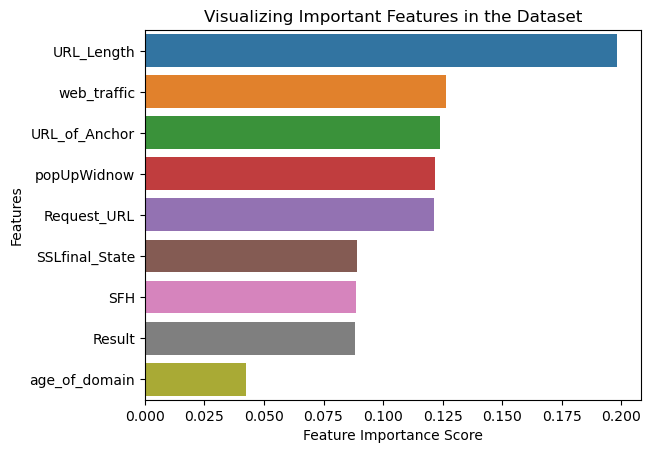

In [28]:
# Visualize feature importances
plt.figure()
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features in the Dataset")
plt.show()

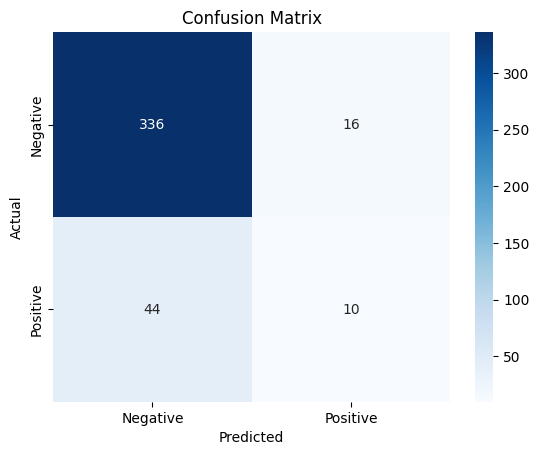

In [20]:
# Display confusion matrix as heatmap
labels = ['Negative', 'Positive']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()